team_only_prediction.ipynb is a jupyter notebook that has as a main objective
determining if the database obtained from lol_df_creation.ipynb is optimal
to create a model to predict the results from each league of legends game
contained in the database
Copyright (C) Keshava Tonathiu Sanchez Barbosa (keshava.t.s.b@gmail.com)

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit
import copy
pd.set_option('display.max_columns', None)

Dataframe erroneo

In [3]:
df = pd.read_csv("team_df.csv")

In [14]:
cols = df.columns
X = copy.copy(df)

In [15]:
X.head()

,gameid,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,...,opp_vspm,opp_totalgold,opp_earnedgold,opp_earned_gpm,opp_goldspent,opp_minionkills,opp_monsterkills,opp_monsterkillsownjungle,opp_monsterkillsenemyjungle,opp_cspm
0,ESPORTSTMNT03/1241318,2220,1,17,11,33,3.0,-1.0,-1.0,-1.0,...,8.5946,62709,38687,1045.5946,62025.0,1021.0,271,193,5,34.9189
1,ESPORTSTMNT03/1241322,2227,-1,5,21,16,1.0,-1.0,-1.0,-1.0,...,10.6960,72004,47911,1290.8217,63975.0,976.0,270,126,48,33.5698
2,ESPORTSTMNT03/1241324,1711,1,21,4,34,4.0,1.0,1.0,-1.0,...,6.8030,42465,23635,828.8136,40375.0,748.0,136,107,0,30.9994
3,ESPORTSTMNT03/1241328,1999,-1,4,17,8,-1.0,-1.0,-1.0,-1.0,...,10.3552,64845,43077,1292.9565,57400.0,911.0,238,148,26,34.4872
4,ESPORTSTMNT03/1241386,1812,-1,3,21,7,-1.0,-1.0,-1.0,-1.0,...,9.8344,58837,38977,1290.6291,51785.0,802.0,197,118,20,33.0795


In [16]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [18]:
X.head()

,gamelength,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,...,opp_vspm,opp_totalgold,opp_earnedgold,opp_earned_gpm,opp_goldspent,opp_minionkills,opp_monsterkills,opp_monsterkillsownjungle,opp_monsterkillsenemyjungle,opp_cspm
0,2220,17,11,33,3.0,-1.0,-1.0,-1.0,-1.0,0.4595,...,8.5946,62709,38687,1045.5946,62025.0,1021.0,271,193,5,34.9189
1,2227,5,21,16,1.0,-1.0,-1.0,-1.0,-1.0,0.1347,...,10.6960,72004,47911,1290.8217,63975.0,976.0,270,126,48,33.5698
2,1711,21,4,34,4.0,1.0,1.0,-1.0,-1.0,0.7364,...,6.8030,42465,23635,828.8136,40375.0,748.0,136,107,0,30.9994
3,1999,4,17,8,-1.0,-1.0,-1.0,-1.0,-1.0,0.1201,...,10.3552,64845,43077,1292.9565,57400.0,911.0,238,148,26,34.4872
4,1812,3,21,7,-1.0,-1.0,-1.0,-1.0,-1.0,0.0993,...,9.8344,58837,38977,1290.6291,51785.0,802.0,197,118,20,33.0795


In [21]:
Y = df['result']
Y

0       1
1      -1
2       1
3      -1
4      -1
       ..
4088   -1
4089   -1
4090    1
4091   -1
4092   -1
Name: result, Length: 4093, dtype: int64

In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [23]:
classifier = DecisionTreeClassifier()

In [24]:
classifier.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
Ypred = classifier.predict(Xtest)

In [26]:
metrics.accuracy_score(Ytest, Ypred)

0.9820846905537459

# Dataframe arreglado

In [2]:
fixed_df = pd.read_csv("team_df.csv")

In [4]:
cols = fixed_df.columns
X = copy.copy(fixed_df)

In [5]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [6]:
Y = fixed_df['result']

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [8]:
classifier = DecisionTreeClassifier()

In [9]:
classifier.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
Ypred = classifier.predict(Xtest)

In [11]:
metrics.accuracy_score(Ytest, Ypred)

0.9812703583061889

In [14]:
#classifier.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.81215216e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.15935341e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.36135921e-02, 8.84004398e-01, 0.00000000e+00,
       0.00000000e+00, 2.47144516e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10208374e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.55371407e-03, 2.10208374e-03, 0.00000000e+00, 1.37391094e-03,
       0.00000000e+00, 0.00000000e+00, 8.04229023e-03, 0.00000000e+00,
      

In [15]:
importance = classifier.feature_importances_

In [18]:
indexes = []
values = []
for i in range(len(importance)):
    if importance[i] > 0.00:
        indexes.append(i)
        values.append(importance[i])
        
print(indexes)

[3, 9, 29, 30, 33, 43, 48, 49, 51, 54, 63, 64, 74, 75, 76, 82, 83, 90, 93, 103, 105, 106, 111]


In [19]:
j = 0
for i in indexes:
    print(i, cols[i], values[j])
    j += 1

3 kills 0.002812152161807213
9 pentakills 0.004159353411182322
29 opp_barons 0.04361359210627782
30 firsttower 0.8840043979305351
33 firstmidtower 0.02471445159245468
43 wardskilled 0.0021020837409508907
48 totalgold 0.0015537140693984831
49 earnedgold 0.0021020837409508907
51 goldspent 0.0013739109417979694
54 monsterkills 0.008042290234323592
63 opp_csat10 0.0009342594404226179
64 golddiffat10 0.0013946806832731934
74 xpdiffat15 0.005015690878190447
75 csdiffat15 0.0007006945803169635
76 opp_kills 0.0027836415551315335
82 opp_pentakills 0.0004659986555134618
83 opp_firstblood 0.0004642481852183914
90 opp_firstbaron 0.0009342594404226179
93 opp_firsttothreetowers 0.0014004260065715963
103 opp_visionscore 0.0016816669927607122
105 opp_totalgold 0.0064096801525876075
106 opp_earnedgold 0.0013210682132672766
111 opp_monsterkillsownjungle 0.002015655286644587


Dataframe completo

In [20]:
df_complete = pd.read_csv('complete_df.csv')

In [21]:
cols = df_complete.columns
X = copy.copy(df_complete)

In [22]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [23]:
Y = df_complete['result']

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [26]:
classifier2 = DecisionTreeClassifier()

In [27]:
classifier2.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
Ypred = classifier2.predict(Xtest)

In [30]:
metrics.accuracy_score(Ytest, Ypred)

0.9796416938110749

In [31]:
classifier2.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.05104187e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.36135921e-02, 8.82643048e-01, 0.00000000e+00,
       0.00000000e+00, 2.47144516e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.44705038e-03, 0.00000000e+00,
      

In [32]:
importance2 = classifier2.feature_importances_

In [33]:
indexes = []
values = []
for i in range(len(importance2)):
    if importance2[i] > 0.00:
        indexes.append(i)
        values.append(importance2[i])
        
#print(indexes)

In [34]:
j = 0
for i in indexes:
    print(i, cols[i], values[j])
    j += 1

14 dragons 0.0010510418704754454
29 opp_barons 0.04361359210627782
30 firsttower 0.882643048460205
33 firstmidtower 0.02471445159245468
54 monsterkills 0.006447050377950408
76 opp_kills 0.0027836415551315335
82 opp_pentakills 0.0004659986555134618
83 opp_firstblood 0.0004642481852183914
105 opp_totalgold 0.0064096801525876075
127 blue_bot_deaths 0.0022931822628555172
132 red_bot_deaths 0.004365866231205696
137 blue_bot_assists 0.005809457516397996
207 blue_bot_dpm 0.0003493841360961512
230 red_jng_damagetakenperminute 0.0010510418704754454
236 blue_mid_damagemitigatedperminute 0.0009342594404226179
325 blue_jng_earnedgold 0.0035034729015848173
345 blue_jng_earnedgoldshare 0.0026276046761886133
376 blue_mid_minionkills 0.0009342594404226179
382 red_bot_minionkills 0.0026442464623977324
390 red_jng_monsterkills 0.0007006945803169635
392 red_bot_monsterkills 0.0013946806832731934
410 red_jng_monsterkillsenemyjungle 0.0017627536611747499
413 red_sup_monsterkillsenemyjungle 0.00210208374095

# Usando un ensemble

In [3]:
df_teams = pd.read_csv('teams_df_final.csv')
df = pd.read_csv('complete_df.csv')

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [6]:
cols = df_teams.columns
X = copy.copy(df_teams)

In [7]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [9]:
Y = df_teams['result']

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [11]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [12]:
clf.fit(Xtrain, Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [13]:
Ypred = clf.predict(Xtest)

In [14]:
metrics.accuracy_score(Ytest, Ypred)

0.9869706840390879

In [15]:
importance3 = clf.feature_importances_

In [22]:
indexes = []
values = []
for i in range(len(importance3)):
    if importance3[i] > 0.00:
        indexes.append(i)
        values.append(importance3[i])
        
j = 0
l = []
for i in indexes:
    #print(i, cols[i], values[j])
    l.append([i, cols[i], values[j]])
    j+= 1

In [23]:
l.sort(key = lambda l : l[2])

In [28]:
for el in range(len(l)):
    print(l[-el])

[7, 'triplekills', 6.255031569748106e-05]
[29, 'opp_barons', 0.09151523020090062]
[30, 'firsttower', 0.07833709063716576]
[34, 'firsttothreetowers', 0.07567334445026973]
[33, 'firstmidtower', 0.0543619186538892]
[25, 'heralds', 0.051744168413892566]
[88, 'opp_oceans', 0.04942105938412081]
[76, 'opp_kills', 0.044855930975827504]
[105, 'opp_totalgold', 0.03878714664674009]
[48, 'totalgold', 0.03664026521126539]
[1, 'gamelength', 0.025564148305328275]
[104, 'opp_vspm', 0.02359999393130134]
[26, 'opp_heralds', 0.023096352965695656]
[32, 'opp_towers', 0.02244487199320426]
[82, 'opp_pentakills', 0.021866427608081298]
[15, 'opp_dragons', 0.01902663426158276]
[27, 'firstbaron', 0.018797883348370983]
[77, 'opp_deaths', 0.017989219425886736]
[13, 'firstdragon', 0.0170424022400253]
[50, 'earned gpm', 0.016703284891451193]
[12, 'ckpm', 0.016142092967190845]
[2, 'result', 0.016031864490783896]
[74, 'xpdiffat15', 0.016023479391506397]
[75, 'csdiffat15', 0.013764920162322834]
[14, 'dragons', 0.013463

# Extra trees con el dataframe completo

In [29]:
cols = df.columns
X = copy.copy(df)

In [30]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)
Y = df_teams['result']

In [31]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [32]:
clf2 = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [33]:
clf2.fit(Xtrain, Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=43, verbose=0,
                     warm_start=False)

In [35]:
Ypred = clf2.predict(Xtest)

In [36]:
metrics.accuracy_score(Ytest, Ypred)

0.9820846905537459

In [41]:
importance4 = clf2.feature_importances_

In [42]:
indexes = []
values = []
for i in range(len(importance4)):
    if importance4[i] > 0.00:
        indexes.append(i)
        values.append(importance4[i])
        
j = 0
l = []
for i in indexes:
    #print(i, cols[i], values[j])
    l.append([i, cols[i], values[j]])
    j+= 1

In [43]:
l.sort(key = lambda l : l[2])

In [44]:
for el in range(len(l)):
    print(l[-el])

[179, 'red_top_pentakills', 1.1072804333931743e-05]
[30, 'firsttower', 0.07476534163983037]
[29, 'opp_barons', 0.05781934270074014]
[34, 'firsttothreetowers', 0.05219907094297596]
[33, 'firstmidtower', 0.049316557410210404]
[48, 'totalgold', 0.035974781831289306]
[105, 'opp_totalgold', 0.03228212338616317]
[27, 'firstbaron', 0.02612820439949028]
[25, 'heralds', 0.0260760733798315]
[74, 'xpdiffat15', 0.02071364813893308]
[88, 'opp_oceans', 0.020440261196987986]
[14, 'dragons', 0.017766366337580802]
[141, 'red_mid_assists', 0.017511281979895835]
[2, 'result', 0.014872508234517516]
[15, 'opp_dragons', 0.014210429530206303]
[91, 'opp_firsttower', 0.013675984845141638]
[336, 'blue_mid_earned gpm', 0.013430048173966425]
[26, 'opp_heralds', 0.013252794799647612]
[340, 'red_jng_earned gpm', 0.012926146286916367]
[75, 'csdiffat15', 0.011843564178835465]
[13, 'firstdragon', 0.011541776901793087]
[82, 'opp_pentakills', 0.011332947404071298]
[32, 'opp_towers', 0.011241988913449113]
[3, 'kills', 0.

# Arbol de decision normal en DF de jugadores sin tomar en cuenta first tower

In [46]:
cols = df_teams.columns
X = copy.copy(df_teams)

In [47]:
X.drop(['gameid', 'result', 'firsttower'], axis = 1, inplace = True)

In [49]:
Y = df_teams['result']

In [50]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [51]:
classifier = DecisionTreeClassifier()

In [52]:
classifier.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
Ypred = classifier.predict(Xtest)

In [54]:
metrics.accuracy_score(Ytest, Ypred)

0.9853420195439739

In [55]:
#classifier.feature_importances_

In [56]:
importance = classifier.feature_importances_

In [57]:
indexes = []
values = []
for i in range(len(importance)):
    if importance[i] > 0.00:
        indexes.append(i)
        values.append(importance[i])
        
j = 0
l = []
for i in indexes:
    #print(i, cols[i], values[j])
    l.append([i, cols[i], values[j]])
    j+= 1

In [58]:
l.sort(key = lambda l : l[2])

In [59]:
for el in range(len(l)):
    print(l[-el])

[82, 'opp_pentakills', 0.0004642481852183914]
[29, 'opp_barons', 0.8849386573709577]
[28, 'barons', 0.04361359210627782]
[32, 'opp_towers', 0.02471445159245468]
[53, 'minionkills', 0.008042290234323592]
[104, 'opp_vspm', 0.0064096801525876075]
[73, 'golddiffat15', 0.005015690878190447]
[9, 'pentakills', 0.004159353411182322]
[3, 'kills', 0.002812152161807213]
[75, 'csdiffat15', 0.0027836415551315335]
[38, 'dpm', 0.0021020837409508907]
[11, 'team kpm', 0.0021020837409508907]
[110, 'opp_monsterkills', 0.002015655286644587]
[37, 'damagetochampions', 0.0016816669927607122]
[47, 'vspm', 0.0015537140693984831]
[92, 'opp_firstmidtower', 0.0014004260065715963]
[63, 'opp_csat10', 0.0013946806832731934]
[105, 'opp_totalgold', 0.0013739109417979694]
[66, 'csdiffat10', 0.0013210682132672766]
[50, 'earned gpm', 0.0009342594404226179]
[65, 'xpdiffat10', 0.0007006945803169635]
[81, 'opp_quadrakills', 0.0004659986555134618]


In [62]:
winners = df_teams[df_teams['result'] == 1]

In [63]:
len(winners)

2151

In [64]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(Ytest, Ypred)

array([[588,   9],
       [  9, 622]], dtype=int64)

# Cross Validation dataframe equipos

In [3]:
df_teams = pd.read_csv('teams_df_final.csv')
df = pd.read_csv('complete_df.csv')

In [4]:
cols = df_teams.columns
X = copy.copy(df_teams)

In [5]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [6]:
Y = df_teams['result']

In [7]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [9]:
shffl = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 43)

In [11]:
cv_results = cross_val_score(clf, X, Y, cv = shffl, scoring = 'f1')

In [12]:
cv_results

array([0.98730159, 0.98566879, 0.99201278, 0.98901099, 0.99386503])

# Cross Validation dataframe equipos 10 folds

In [13]:
df_teams = pd.read_csv('teams_df_final.csv')
df = pd.read_csv('complete_df.csv')

In [14]:
cols = df_teams.columns
X = copy.copy(df_teams)

In [15]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [16]:
Y = df_teams['result']

In [17]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [18]:
shffl = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 43)

In [19]:
cv_results = cross_val_score(clf, X, Y, cv = shffl, scoring = 'f1')

In [20]:
cv_results

array([0.98730159, 0.98566879, 0.99201278, 0.98901099, 0.99386503,
       0.98989899, 0.99009901, 0.99153195, 0.98693313, 0.98825372])

In [28]:
cv_results_list = cv_results.tolist()

In [36]:
sorted_results = sorted(cv_results_list, reverse = True)

[0.9938650306748467,
 0.9920127795527156,
 0.99153194765204,
 0.9900990099009901,
 0.9898989898989898,
 0.989010989010989,
 0.9882537196554425,
 0.9873015873015872,
 0.9869331283627978,
 0.9856687898089173]

In [22]:
print("Accuracy: %0.4f (+/- %0.4f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.9895 (+/- 0.0048)


In [37]:
print("Best score: %0.4f" % (sorted_results[0]))

Best score: 0.9939


In [38]:
print("Worst score: %0.4f" % (sorted_results[len(sorted_results) - 1]))

Worst score: 0.9857


# Cross Validation 10 folds dataframe completo

In [39]:
cols = df.columns
X = copy.copy(df)

In [40]:
X.drop(['gameid', 'result'], axis = 1, inplace = True)

In [41]:
Y = df_teams['result']

In [42]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [43]:
shffl = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 43)

In [44]:
cv_results = cross_val_score(clf, X, Y, cv = shffl, scoring = 'f1')

In [45]:
cv_results

array([0.98248408, 0.98248408, 0.99280576, 0.98664572, 0.98845266,
       0.98988327, 0.98707224, 0.98763524, 0.98535081, 0.98827209])

In [46]:
cv_results_list = cv_results.tolist()

In [47]:
sorted_results = sorted(cv_results_list, reverse = True)

[0.9928057553956834,
 0.9898832684824903,
 0.9884526558891455,
 0.9882720875684128,
 0.9876352395672333,
 0.9870722433460076,
 0.9866457187745482,
 0.9853508095605242,
 0.982484076433121,
 0.982484076433121]

In [48]:
print("Accuracy: %0.4f (+/- %0.4f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.9871 (+/- 0.0060)


In [49]:
print("Best score: %0.4f" % (sorted_results[0]))

Best score: 0.9928


In [50]:
print("Worst score: %0.4f" % (sorted_results[len(sorted_results) - 1]))

Worst score: 0.9825


# Correlacion dataframe equipos

In [21]:
df_teams = pd.read_csv('teams_df_final.csv')
df = pd.read_csv('complete_df.csv')

In [22]:
correlation = df_teams.corr()

In [23]:
result_corr = correlation['result']

In [24]:
df_result = pd.DataFrame(result_corr)

In [25]:
df_result

,result
gamelength,-0.058379
result,1.000000
kills,0.649912
deaths,-0.712262
assists,0.650689
...,...
opp_minionkills,-0.084849
opp_monsterkills,-0.393583
opp_monsterkillsownjungle,-0.058098
opp_monsterkillsenemyjungle,-0.510468


In [26]:
names = df_result.index
names = names.tolist()

In [47]:
#names

<BarContainer object of 113 artists>

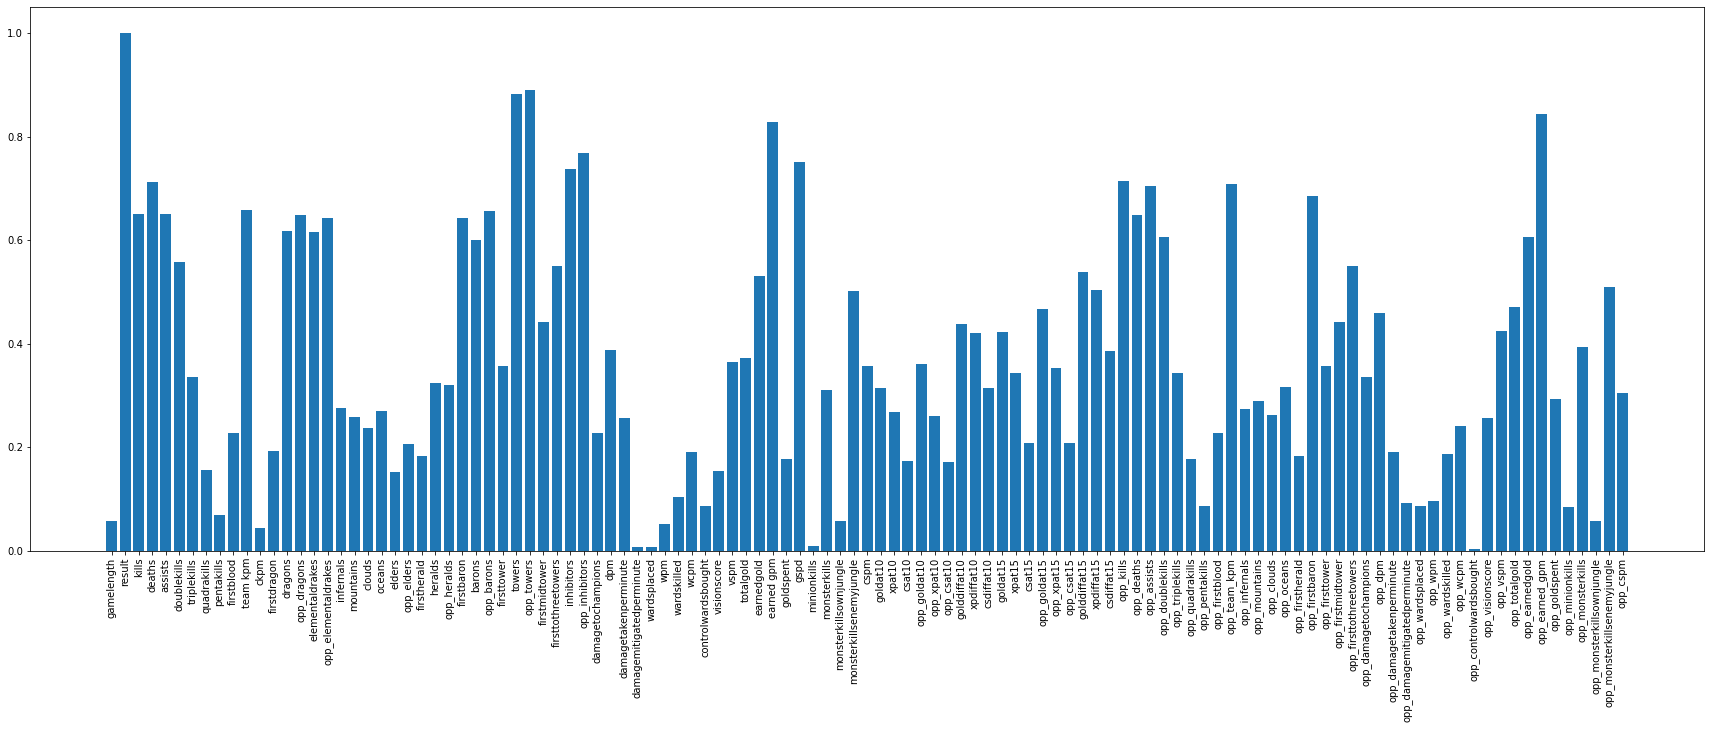

In [28]:
plt.figure(figsize = (30, 10))
plt.xticks(rotation = 90)
plt.bar(names, abs(result_corr))

In [29]:
result_corr_list = result_corr.tolist()

In [30]:
abs_result = [abs(x) for x in result_corr_list]

In [46]:
#abs_result

In [45]:
#names

In [33]:
names_result = [[names[i], abs_result[i]] for i in range(len(abs_result))]

In [34]:
names_result.sort(key = lambda names_result : names_result[1], reverse = True)

In [44]:
#names_result

In [36]:
above_thresh = [x for x in names_result if x[1] > 0.6 and x[1] < 1.0]

In [43]:
#above_thresh

In [38]:
above_thresh_names = [x[0] for x in above_thresh]
above_thresh_values = [x[1] for x in above_thresh]

<BarContainer object of 24 artists>

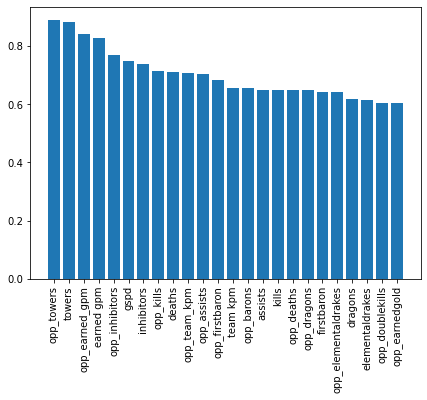

In [39]:
plt.figure(figsize = (7, 5))
plt.xticks(rotation = 90)
plt.bar(above_thresh_names, above_thresh_values)

# Modelo con unicamente los atributos con una correlacion mayor a 0.6

In [40]:
df_teams = pd.read_csv('teams_df_final.csv')
df = pd.read_csv('complete_df.csv')

In [49]:
X = df_teams[above_thresh_names]

In [50]:
Y = df_teams['result']

In [51]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [52]:
shffl = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 43)

In [53]:
cv_results = cross_val_score(clf, X, Y, cv = shffl, scoring = 'f1')

In [54]:
cv_results

array([0.98810468, 0.98649722, 0.99123506, 0.98899371, 0.99616858,
       0.98911353, 0.99240122, 0.99230769, 0.98695318, 0.99217527])

In [55]:
cv_results_list = cv_results.tolist()

In [56]:
sorted_results = sorted(cv_results_list, reverse = True)

In [57]:
print("Accuracy: %0.4f (+/- %0.4f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.9904 (+/- 0.0057)


In [58]:
print("Best score: %0.4f" % (sorted_results[0]))

Best score: 0.9962


In [59]:
print("Worst score: %0.4f" % (sorted_results[len(sorted_results) - 1]))

Worst score: 0.9865


# Modelo quitando redundancia de atributos por ejemplo: deaths y opp_kills contienen 'la misma informacion', en el sentido que las veces que muere el equipo azul son las mismas que la cantidad de asesinatos que tiene el equipo rojo

In [64]:
#above_thresh_names

['opp_towers',
 'towers',
 'opp_earned_gpm',
 'earned gpm',
 'opp_inhibitors',
 'gspd',
 'inhibitors',
 'opp_kills',
 'deaths',
 'opp_team_kpm',
 'opp_assists',
 'opp_firstbaron',
 'team kpm',
 'opp_barons',
 'assists',
 'kills',
 'opp_deaths',
 'opp_dragons',
 'firstbaron',
 'opp_elementaldrakes',
 'dragons',
 'elementaldrakes',
 'opp_doublekills',
 'opp_earnedgold']

In [66]:
#X

,opp_towers,towers,opp_earned_gpm,earned gpm,opp_inhibitors,gspd,inhibitors,opp_kills,deaths,opp_team_kpm,opp_assists,opp_firstbaron,team kpm,opp_barons,assists,kills,opp_deaths,opp_dragons,firstbaron,opp_elementaldrakes,dragons,elementaldrakes,opp_doublekills,opp_earnedgold
0,4.0,8.0,1045.5946,1213.6486,0.0,0.004023,1.0,11,11,0.2973,25,0.0,0.4595,0.0,33,17,17,3.0,1.0,3.0,2.0,2.0,0.0,38687
1,9.0,2.0,1290.8217,894.2075,1.0,-0.122771,0.0,21,21,0.5658,41,1.0,0.1347,2.0,16,5,5,4.0,0.0,4.0,1.0,1.0,2.0,47911
2,1.0,10.0,828.8136,1376.3179,0.0,0.225957,2.0,4,4,0.1403,11,0.0,0.7364,0.0,34,21,21,0.0,1.0,0.0,4.0,4.0,1.0,23635
3,9.0,3.0,1292.9565,869.8649,1.0,-0.170132,0.0,17,17,0.5103,33,1.0,0.1201,2.0,8,4,4,3.0,0.0,3.0,2.0,2.0,3.0,43077
4,8.0,4.0,1290.6291,952.7483,1.0,-0.096665,0.0,21,21,0.6954,41,1.0,0.0993,2.0,7,3,3,4.0,0.0,4.0,1.0,1.0,3.0,38977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,9.0,1.0,1317.4348,813.5480,1.0,-0.194437,0.0,23,23,0.7662,30,1.0,0.2665,1.0,17,8,9,3.0,0.0,3.0,1.0,1.0,2.0,39545
4089,8.0,4.0,1160.8179,985.0022,1.0,0.036182,0.0,8,8,0.2066,22,1.0,0.0775,2.0,7,3,3,4.0,0.0,4.0,2.0,2.0,1.0,44943
4090,2.0,11.0,925.1613,1247.0009,0.0,0.131394,3.0,3,3,0.0785,5,0.0,0.2354,0.0,17,9,9,1.0,1.0,1.0,5.0,4.0,0.0,35372
4091,9.0,3.0,1224.7838,1001.5915,1.0,-0.072507,0.0,12,12,0.3312,35,1.0,0.1932,1.0,18,7,7,3.0,0.0,3.0,2.0,2.0,2.0,44378


In [ ]:
X = df_teams[above_thresh_names] #hay que correr la secccion de correlacion antes de poder acceder a estas predicciones

In [67]:
X.drop('deaths', axis = 1, inplace = True)
X.drop('opp_deaths', axis = 1, inplace = True)
X.drop('elementaldrakes', axis = 1, inplace = True)
X.drop('opp_elementaldrakes', axis = 1, inplace = True)

C:\Users\kesha\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
X

,opp_towers,towers,opp_earned_gpm,earned gpm,opp_inhibitors,gspd,inhibitors,opp_kills,opp_team_kpm,opp_assists,opp_firstbaron,team kpm,opp_barons,assists,kills,opp_dragons,firstbaron,dragons,opp_doublekills,opp_earnedgold
0,4.0,8.0,1045.5946,1213.6486,0.0,0.004023,1.0,11,0.2973,25,0.0,0.4595,0.0,33,17,3.0,1.0,2.0,0.0,38687
1,9.0,2.0,1290.8217,894.2075,1.0,-0.122771,0.0,21,0.5658,41,1.0,0.1347,2.0,16,5,4.0,0.0,1.0,2.0,47911
2,1.0,10.0,828.8136,1376.3179,0.0,0.225957,2.0,4,0.1403,11,0.0,0.7364,0.0,34,21,0.0,1.0,4.0,1.0,23635
3,9.0,3.0,1292.9565,869.8649,1.0,-0.170132,0.0,17,0.5103,33,1.0,0.1201,2.0,8,4,3.0,0.0,2.0,3.0,43077
4,8.0,4.0,1290.6291,952.7483,1.0,-0.096665,0.0,21,0.6954,41,1.0,0.0993,2.0,7,3,4.0,0.0,1.0,3.0,38977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,9.0,1.0,1317.4348,813.5480,1.0,-0.194437,0.0,23,0.7662,30,1.0,0.2665,1.0,17,8,3.0,0.0,1.0,2.0,39545
4089,8.0,4.0,1160.8179,985.0022,1.0,0.036182,0.0,8,0.2066,22,1.0,0.0775,2.0,7,3,4.0,0.0,2.0,1.0,44943
4090,2.0,11.0,925.1613,1247.0009,0.0,0.131394,3.0,3,0.0785,5,0.0,0.2354,0.0,17,9,1.0,1.0,5.0,0.0,35372
4091,9.0,3.0,1224.7838,1001.5915,1.0,-0.072507,0.0,12,0.3312,35,1.0,0.1932,1.0,18,7,3.0,0.0,2.0,2.0,44378


In [69]:
Y = df_teams['result']

In [70]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)

In [71]:
shffl = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 43)

In [72]:
cv_results = cross_val_score(clf, X, Y, cv = shffl, scoring = 'f1')

In [73]:
cv_results

array([0.99127676, 0.99047619, 0.99203822, 0.98977183, 0.99693721,
       0.99066874, 0.99315589, 0.99461124, 0.98924731, 0.99217527])

In [74]:
cv_results_list = cv_results.tolist()

In [75]:
sorted_results = sorted(cv_results_list, reverse = True)

In [76]:
print("Accuracy: %0.4f (+/- %0.4f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.9920 (+/- 0.0045)


In [77]:
print("Best score: %0.4f" % (sorted_results[0]))

Best score: 0.9969


In [78]:
print("Worst score: %0.4f" % (sorted_results[len(sorted_results) - 1]))

Worst score: 0.9892
